# Astronomy 19 Final Project

In this project we analyze real data from JWST to do object detection, flux measurements, and false color image creation

## 1. + 2. Get `astropy` and `sep` and install it on your system (pip install astropy sep).

Uncomment to install `astropy` and `sep`

In [1]:
# ! pip install astropy
# ! pip install sep

## 3. Follow the online sep tutorial 

found at https://sep.readthedocs.io/en/stable/tutorial.htmlLinks to an external site., but use the astropy fits routines instead of fitsio (astropy fits documenationLinks to an external site.). 

Create a notebook that performs the tutorial and comment it using Markdown to explain what it’s doing. Note that the fits image used in the tutorial can be acquired via the sep GitHub account.

<span style="color:crimson">

This is done in the notebook `sep_tutorial.ipynb`

</span>

## 4. Augment the tutorial to save each of the four figures to PNG files.

<span style="color:crimson">
    
The PNGs are stored in `sep-tutorial-figures`

## 5. Download NIRCAM images of NGC 3324 using the tutorial 

Go to `Final_Project_Downloading_NGC_3324_data.pdf` to see the tutorial

/!\ Warning /!\ : The downloaded zip file is 9 Go, and the extracted files are 19 Go, meaning you need ~30 Go of available space on your disk. If you don’t have that space, let your instructor know.

## 6. Redo the tutorial steps in a second notebook, but on the NIRCAM image of NGC 3324

with the clear-f090w filters named jw02731-o001_t017_nircam_clear-f090w_i2d.fits . How many sources do you find? Histogram their fluxes.

---

Setup notebook with libraries and magic command

In [2]:
import sep
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

### 6.1 Open clear-f090w filter NIRCAM imaghe of NGC 3324 and do basic visualization and analysis

Open downloaded `.fits` data using `astropy.io.fits`

In [3]:
file_path = './Data/MAST_2025-06-08T1833/JWST/jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_i2d.fits'
hdul = fits.open(file_path)

In [4]:
# print info
print(hdul.info())

Filename: ./Data/MAST_2025-06-08T1833/JWST/jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     365   ()      
  1  SCI           1 ImageHDU        75   (14339, 8582)   float32   
  2  ERR           1 ImageHDU        10   (14339, 8582)   float32   
  3  CON           1 ImageHDU        10   (14339, 8582, 6)   int32   
  4  WHT           1 ImageHDU         9   (14339, 8582)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (14339, 8582)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (14339, 8582)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (14339, 8582)   float32   
  8  HDRTAB        1 BinTableHDU    532   160R x 261C   [23A, 5A, 3A, 45A, 6A, 13A, 7A, 5A, 6A, 7A, 10A, 4A, L, D, D, 32A, 50A, 32A, 21A, 3A, 3A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 23A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 8A, 5A, D, D, D,

In [5]:
# access the "science" image data
sci_data = hdul['sci'].data
sci_data = sci_data.astype(np.float32)

In [6]:
hdul.close()

Data surface look

In [7]:
print(np.shape(sci_data))
print("NaNs in SCI:", np.isnan(sci_data).sum(), "/", sci_data.size)
print(f"Max: {np.nanmax(sci_data)}")
print(f"Min: {np.nanmin(sci_data)}")

(8582, 14339)
NaNs in SCI: 4461608 / 123057298
Max: 5704.06201171875
Min: -3.2904701232910156


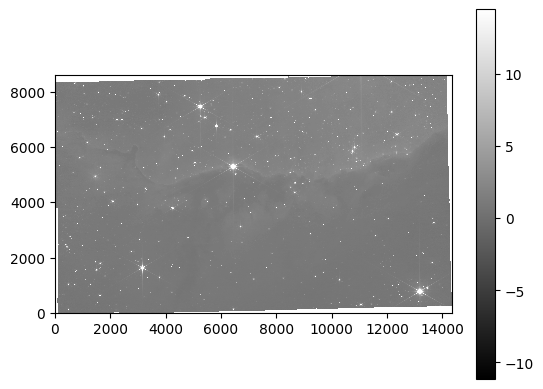

In [19]:
# show the image
# plt.figure(figsize=(10, 10))
m, s = np.nanmean(sci_data), np.nanstd(sci_data)
plt.imshow(sci_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

# plt.savefig('./jwst-saved-figures/fits_image.png', bbox_inches='tight')
plt.show()

Change type to `float32` so it takes less RAM

In [20]:
sci_data = sci_data.astype(np.float32)

### 6.2 Calculate and visualize the "background" of the image

In [21]:
# measure a spatially varying background on the image
bkg = sep.Background(sci_data)

In [22]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

1.1997147798538208
0.06582547724246979


In [23]:
bkg_image = np.array(bkg)

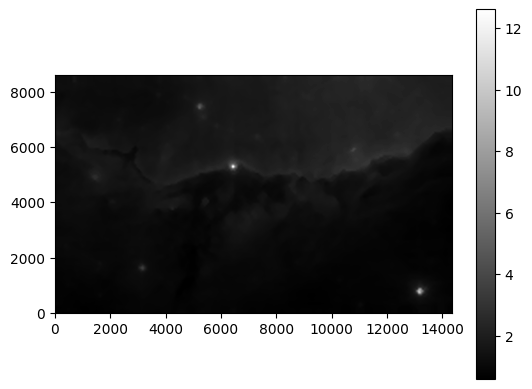

In [24]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

# plt.savefig('./jwst-saved-figures/background_image.png', bbox_inches='tight')
plt.show()

### 6.3 Calculate and visualize the "background" root mean square of the image

In [15]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

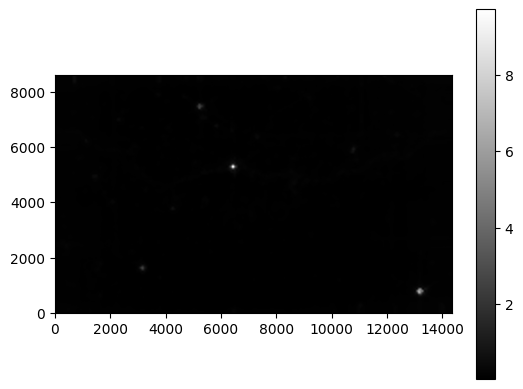

In [16]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

# plt.savefig('./jwst-saved-figures/background_rms.png', bbox_inches='tight')
plt.show()

### 6.3 Suptract background from the image data to get rid of background noise that would interfere with object detection

In [17]:
# subtract the background
data_sub = sci_data - bkg

In [18]:
# default is 300000
# sep.set_extract_pixstack(400000)

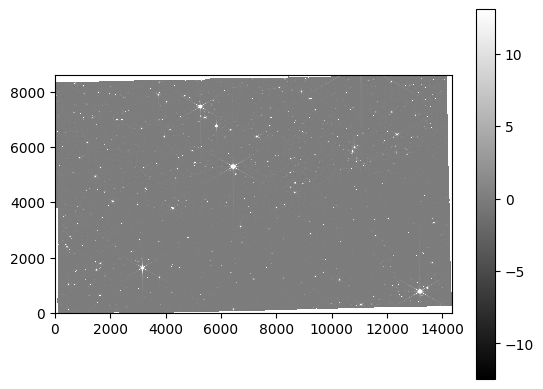

In [19]:
# show the data sub background noise
m, s = np.nanmean(data_sub), np.nanstd(data_sub)
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

# plt.savefig('./jwst-saved-figures/background_rms.png', bbox_inches='tight')
plt.show()

### 6.4 Do object detection with `sep.extract`

In [20]:
thresh_scalar = 10
objects = sep.extract(data_sub, thresh_scalar, err=bkg.globalrms)

In [21]:
# how many objects were detected
print(f" Found {len(objects)} objects at the threshold {thresh_scalar} * err")

 Found 12007 objects at the threshold 10 * err


<span style="color:red">  

### 6.4.1 Found 12007 sources at the threshold 10 * err

Plot ellipses around the detected objects

In [22]:
from matplotlib.patches import Ellipse

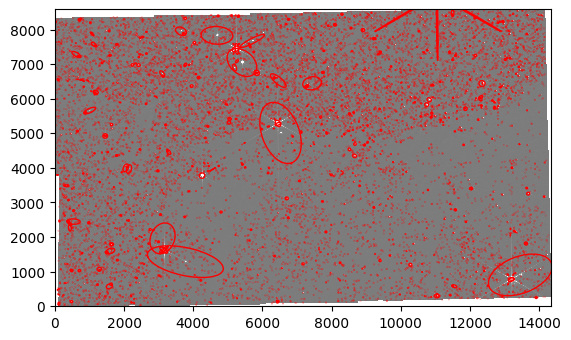

In [23]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.nanmean(data_sub), np.nanstd(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

# plt.savefig('./sep-tutorial-figures/object_detection.png', bbox_inches='tight')
plt.show()

### 6.5 Calculate flux of detected objects with `sep.sum_circle`

In [24]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [25]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 36.589886 +/- 6.059121
object 1: flux = 11.585197 +/- 3.421581
object 2: flux = 249.575570 +/- 15.801828
object 3: flux = 36.325957 +/- 6.037201
object 4: flux = 474.404164 +/- 21.783642
object 5: flux = 15.155003 +/- 3.908605
object 6: flux = 56.966824 +/- 7.555762
object 7: flux = 80.441002 +/- 8.975719
object 8: flux = 21.400567 +/- 4.639337
object 9: flux = 15.415445 +/- 3.941891


In [26]:
print(np.nanmin(flux), np.nanmax(flux))

7.999049682617189 72769.94941894533


<span style="color:crimson">

### 6.6 Histogram the flux

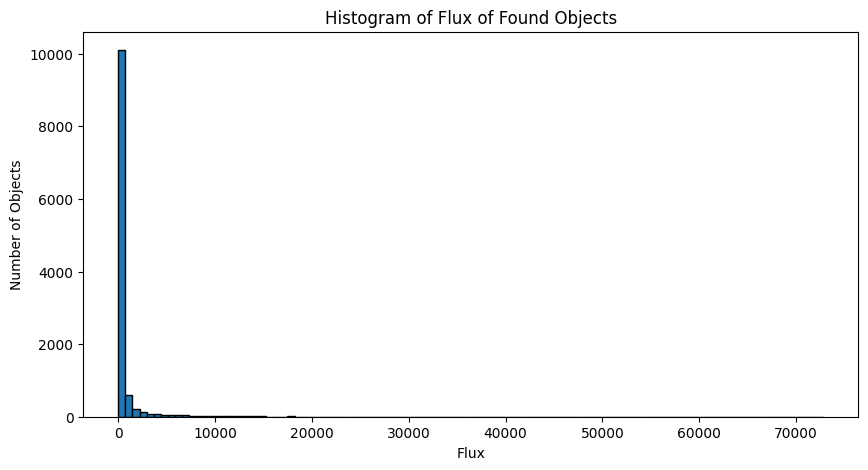

In [27]:
# create histogram with bins
num_bins = 101  # number of bins minus one because this defines the boundary numbers
histmin = np.floor(np.nanmin(flux))
histmax = np.ceil(np.nanmax(flux))

# make the limits of the bins with np.arange (makes a np from histmin -> histmax with steps of width)
bins = np.linspace(histmin, histmax, num_bins)

# plot the data as a histogram
plt.figure(figsize=(10,5))  # adujust figsize
plt.hist(flux, bins=bins, edgecolor="k")
plt.title("Histogram of Flux of Found Objects")
plt.xlabel("Flux")
plt.ylabel("Number of Objects")
# plt.savefig("cj2-prompt9.pdf", bbox_inches="tight")
plt.show()

<span style="color:crimson">

### 6.6.1 Zoomed in histogram at flux, can see the largest outlier at around 70,000+

Zoomed in on the y-axis

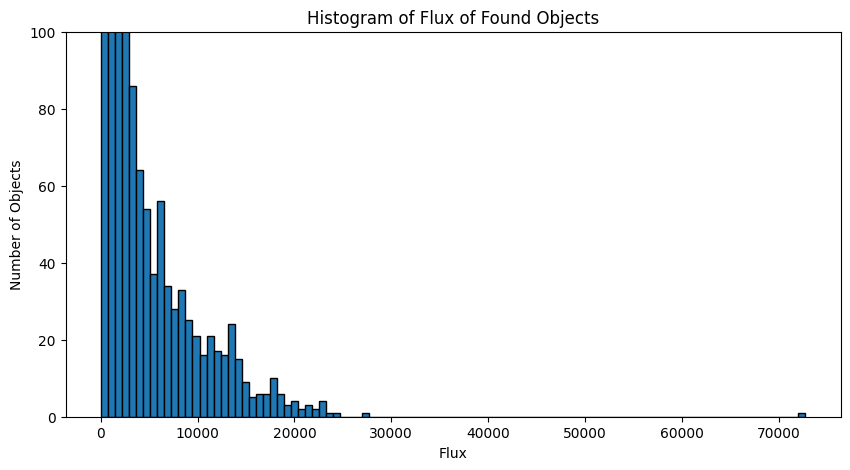

In [28]:
# create histogram with bins
num_bins = 101  # number of bins minus one because this defines the boundary numbers
histmin = np.floor(np.nanmin(flux))
histmax = np.ceil(np.nanmax(flux))

# make the limits of the bins with np.arange (makes a np from histmin -> histmax with steps of width)
bins = np.linspace(histmin, histmax, num_bins)

# plot the data as a histogram
plt.figure(figsize=(10,5))  # adujust figsize
plt.hist(flux, bins=bins, edgecolor="k")
plt.title("Histogram of Flux of Found Objects")
plt.xlabel("Flux")
plt.ylabel("Number of Objects")
plt.ylim(0, 100)
# plt.savefig("cj2-prompt9.pdf", bbox_inches="tight")
plt.show()

## 7. What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean?

<span style="color:crimson">
    
### 7.1 Mean, median, and standard deviation

The mean of the flux is 1.67565 <br>
The median of the flux is 1.22717<br>
The standard deviation of the flux is 12.82266

In [29]:
flux_mean = np.nanmean(sci_data)
flux_median = np.nanmedian(sci_data)
flux_std = np.nanstd(sci_data)

print(f"The mean of the flux is {flux_mean:.5f}")
print(f"The median of the flux is {flux_median:.5f}")
print(f"The standard deviation of the flux is {flux_std:.5f}")

The mean of the flux is 1.67565
The median of the flux is 1.22717
The standard deviation of the flux is 12.82266


### 7.2 Find Outliers With Chauvenet's Criterion

In [30]:
from scipy.special import erf

In [31]:
def event_probability(x, mu=0.0, s=1.0):
    # x is the value of the event
    # mu is the gaussian mean
    # s is the gaussian std

    # z is how many sigma x is from the mean
    z = np.fabs( (x-mu) / s )

    # the erf is the primitive or (anti-derivative) of
    # the gaussian function, it's value is directly related
    # to the area under the gaussian curve, and therefore probabilities
    return 1.0 - erf( z / np.sqrt(2) )

In [32]:
def chauvenet_critierion(prior_measurements, outlier):
    # prior measurements is our set of previous measurements
    # outlier is the value we want to check

    # return True if the outlier can be discard
    # false otherwise

    # compute the mean and std if prior measurements
    # and assume these are representative of a the gaussian
    mean = np.nanmean(prior_measurements)
    std = np.nanstd(prior_measurements)

    # compute the probability of the outlier
    outlier_probability = event_probability(outlier, mu=mean, s=std)

    # get number of events, including the outlier
    N = len(prior_measurements) + 1

    # check Chauvenet's criterion
    if N * outlier_probability < 0.5:
        # reject the outlier
        return True
    
    return False

In [33]:
outliers = []
for i in range(len(objects)):
    if chauvenet_critierion(flux, flux[i]):
        outliers.append(((objects['x'][i], objects['y'][i]), flux[i], i))

<span style="color:crimson">
    
### 7.3 What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean?

We identified 183 outliers. <br>
The largest outlier flux is 72769.94941894533 at position (13195.3555, 788.9178). <br>
The largest outlier is 5674.9730 standard deviations away.

In [ ]:
print(f"We identified {len(outliers)} outliers.")

outlier_flux = np.array([o_flux for _, o_flux, _ in outliers])
outlier_i = np.array([i for _, _, i in outliers])

largest_o = outliers[np.argmax(outlier_flux)]
largest_o_flux = largest_o[1]
largest_o_position = largest_o[0]
largest_o_i = largest_o[2]

print(f"The largest outlier flux is {largest_o_flux} at position ({largest_o_position[0]:.4f}, {largest_o_position[1]:.4f}).")

sigmas_away = np.fabs(flux_mean - largest_o_flux) / flux_std

print(f"The largest outlier is {sigmas_away:.4f} sigmas away.")

We identified 183 outliers.
The largest flux is 72769.94941894533 at position (13195.3555, 788.9178).
The largest outlier is 5674.9730 sigmas away.


### 7.4 Plot The Object Detection Ellipses Color Coded If they Are Outliers

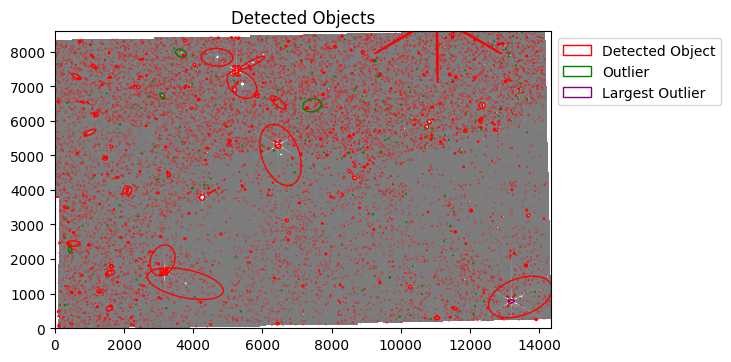

In [35]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.nanmean(data_sub), np.nanstd(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object

largest_flux_legend = False
outlier_legend = False
object_legend = False

for i in range(len(objects)):
    
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
            width=6*objects['a'][i],
            height=6*objects['b'][i],
            angle=objects['theta'][i] * 180. / np.pi)
    
    if i == largest_o_i:
        e.set_edgecolor('purple')
        if not largest_flux_legend:
            e.set_label('Largest Outlier')
            largest_flux_legend = True
    elif i in outlier_i:
        e.set_edgecolor('green')
        if not outlier_legend:
            e.set_label('Outlier')
            outlier_legend = True
    else:
        e.set_edgecolor('red')
        if not object_legend:
            e.set_label('Detected Object')
            object_legend = True
    
    e.set_facecolor('none')
    ax.add_artist(e)

plt.title("Detected Objects")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.savefig('./jwst-saved-figures/object_detection.png', bbox_inches='tight')
plt.show()

Delete variables to save RAM

In [36]:
del objects
del m
del s
del bkg
del bkg_rms
del flux, fluxerr, flag
del outliers, data_sub

## 8. Reproject the 5 other files using [this script](https://github.com/an0wen/an0wen-astr19-spring25/blob/main/Final-Project/reproject.py). using "clear-f090w" as a reference, and then load all the reprojected fits files into the same notebook. Make a 3-color false image of the NGC 3324 by combining all 6 images in any way of your choice. Save the image as a PNG.

### 8.1 Reproject the other filters' .fit files using "clear-f090w" as a reference.

In [8]:
# ---------------------------------
# 0. Copy all this script into one cell, between steps 7 and 8 of your final project
#    You will need to install the "reproject" package with pip
#    This script will "reproject" all images onto the same shape using one image as a reference
# ---------------------------------

from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp

Uncomment the following cell to reproject the images

In [9]:
# jwst_folder = './Data/MAST_2025-06-08T1833/JWST'

# # ---------------------------------
# # 1. Load your reference image
# #    This will define the WCS and shape for all others
# # ---------------------------------
# file_reference = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_i2d.fits" # [PATH TO YOUR clear-f090w FITS FILE HERE]
# with fits.open(file_reference) as hdulist:
#     # For JWST i2d images, 'SCI' is commonly the science extension
#     ref_header = hdulist['SCI'].header
#     ref_data = hdulist['SCI'].data

# ref_data = ref_data.astype(np.float32)

# # Create a WCS object from the reference
# ref_wcs = WCS(ref_header)

# # This shape will be used for all reprojected images
# output_shape = ref_data.shape

# # ---------------------------------
# # 2. Reproject the other images
# # ---------------------------------
# fname1 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_i2d.fits" # [PATH TO OTHER FITS FILE HERE]
# fname2 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_i2d.fits" # [PATH TO OTHER FITS FILE HERE]
# fname3 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nircam_clear-f335m_i2d.fits" # [PATH TO OTHER FITS FILE HERE]
# fname4 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f444w/jw02731-o001_t017_nircam_clear-f444w_i2d.fits" # [PATH TO OTHER FITS FILE HERE]
# fname5 = jwst_folder + "/" + "jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-f470n_i2d.fits" # [PATH TO OTHER FITS FILE HERE]

# other_filenames = [
#     fname1,
#     fname2,
#     fname3,
#     fname4,
#     fname5,
# ]

# # Reproject all other files according to the reference
# for fname in other_filenames:
#     with fits.open(fname) as hdulist:
#         data = hdulist['SCI'].data
#         header = hdulist['SCI'].header
#         wcs_in = WCS(header)

#     data = data.astype(np.float32)
    
#     # Reproject this image onto the reference WCS
#     # reproject_interp returns (reprojected_data, footprint)
#     reprojected_data, footprint = reproject_interp(
#         (data, wcs_in),
#         ref_wcs,
#         shape_out=output_shape,
#         block_size='auto'
#     )

#     # Optionally, update the header to match the reference WCS
#     # so that the new FITS is self-consistent
#     new_header = ref_header.copy()

#     # Save the new file
#     out_name = fname.replace('.fits', '_reproj.fits')
#     hdu = fits.PrimaryHDU(reprojected_data, header=new_header)
#     hdu.writeto(out_name, overwrite=True)
#     print(f"Reprojected {fname} -> {out_name}")

### 8.2 Load the reprojected `.fits` filter image data into the notebook  

In [32]:
jwst_folder = './Data/MAST_2025-06-08T1833/JWST'

# in wavelength order
fname1 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_i2d_reproj.fits" # [PATH TO OTHER FITS FILE HERE]
fname2 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_i2d_reproj.fits" # [PATH TO OTHER FITS FILE HERE]
fname3 = jwst_folder + "/" + "jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-f470n_i2d_reproj.fits" # [PATH TO OTHER FITS FILE HERE]
fname4 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nircam_clear-f335m_i2d_reproj.fits" # [PATH TO OTHER FITS FILE HERE]
fname5 = jwst_folder + "/" + "jw02731-o001_t017_nircam_clear-f444w/jw02731-o001_t017_nircam_clear-f444w_i2d_reproj.fits" # [PATH TO OTHER FITS FILE HERE]


other_filenames = [
    fname1,
    fname2,
    fname3,
    fname4,
    fname5,
]

# in wavelength order
reproj_filter_names = ['clear-f187n',
                       'clear-f200w',
                       'f444w-f470n',
                       'clear-f335m',
                       'clear-f444w',
                       ]

all_filter_data = {}

all_filter_data['clear-4090w'] = sci_data

for i, fname in enumerate(other_filenames):
    with fits.open(fname) as hdulist:
        all_filter_data[reproj_filter_names[i]] = hdulist['SCI'].data.astype(np.float32)

In [33]:
print(all_filter_data.keys())

dict_keys(['clear-4090w', 'clear-f187n', 'clear-f200w', 'f444w-f470n', 'clear-f335m', 'clear-f444w'])


### 8.3 Make a 3-color false image of the NGC 3324 by combining all 6 images in any way of your choice. Then save it as a PNG.

<span style="color:red"> False color images are saved in `./jwst-saved-figures` as `false_color_ngcc_3324_{i}.png` where `i` is a number identifier for the different images I created

#### 8.3.1 Create a function to rescale the image using log_10 to diminish the effect of really bright lights, a min and max to control the lowest and brightest lights we consider in the image, and finally scaling that between 0 and 1

In [34]:
def rescale_image(data, vmin=0.16, vmax=30):

    print("rescaling image...")
    
    # copy the data to avoid accidentaly overwriting it
    data_tmp = data.copy()

    # compute the mean value over all data, excluding NaN (Not a Number)
    m = np.nanmean(data_tmp)

    # any data points below vpmin is assigned the value vpmin
    # any data points above vpmax is assigned the value vpmax
    vpmin = vmin * m
    print(f"VPMIN: {vpmin}")
    data_tmp[data_tmp < vpmin] = vpmin

    if vmax is not None:
        vpmax = vmax * m
        print(f"VPMAX: {vpmax}")
        data_tmp[data_tmp > vpmax] = vpmax

    # apply log-scale
    data_tmp = np.log10(data_tmp)

    # scale between 0 and 1
    dmin = np.nanmin(data_tmp)
    dmax = np.nanmax(data_tmp)

    print(dmin, dmax)

    data_tmp = (data_tmp - dmin)/(dmax-dmin)

    data_tmp = data_tmp.astype(np.float32)

    print("rescaling complete!")

    return data_tmp

Test it on one filter

rescaling image...
VPMIN: 0.8527777791023254
VPMAX: 159.8958282470703
-0.06916413 2.2038372
rescaling complete!


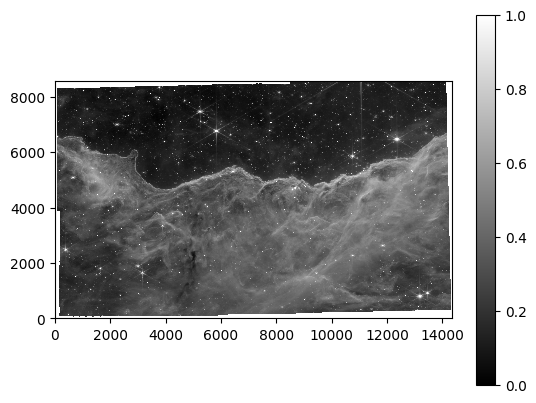

In [35]:
# show the image
# plt.figure(figsize=(10, 10))

test_data = rescale_image(all_filter_data['clear-f335m'])

plt.imshow(test_data, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

# plt.savefig('./jwst-saved-figures/fits_image.png', bbox_inches='tight')
plt.show()

#### 8.3.2 Rescale Data and Data Processing

In [36]:
from matplotlib import colors as mcolors

In [37]:
# get filter colors
filter_colors = [mcolors.to_rgb('blue'),
mcolors.to_rgb('cyan'),
mcolors.to_rgb('green'),
mcolors.to_rgb('yellow'),
mcolors.to_rgb('orange'),
mcolors.to_rgb('red')
]

filter_colors

[(0.0, 0.0, 1.0),
 (0.0, 1.0, 1.0),
 (0.0, 0.5019607843137255, 0.0),
 (1.0, 1.0, 0.0),
 (1.0, 0.6470588235294118, 0.0),
 (1.0, 0.0, 0.0)]

In [16]:
filter_names = list(all_filter_data.keys())
filter_names

['clear-4090w',
 'clear-f187n',
 'clear-f200w',
 'f444w-f470n',
 'clear-f335m',
 'clear-f444w']

In [38]:
for f_name in filter_names:
    all_filter_data[f_name] = rescale_image(all_filter_data[f_name])

rescaling image...
VPMIN: 0.26810330152511597
VPMAX: 50.269371032714844
-0.57169783 1.7013035
rescaling complete!
rescaling image...
VPMIN: 2.3377902507781982
VPMAX: 438.3356628417969
0.36880556 2.6418068
rescaling complete!
rescaling image...
VPMIN: 0.41360050439834595
VPMAX: 77.55009460449219
-0.38341895 1.8895823
rescaling complete!
rescaling image...
VPMIN: 0.6071533560752869
VPMAX: 113.84125518798828
-0.2167016 2.0562997
rescaling complete!
rescaling image...
VPMIN: 0.8527777791023254
VPMAX: 159.8958282470703
-0.06916413 2.2038372
rescaling complete!
rescaling image...
VPMIN: 0.5711281299591064
VPMAX: 107.0865249633789
-0.24326645 2.0297348
rescaling complete!


#### 8.3.3 Method 1 - Use Suggested NIRCAM color palette 

In [17]:
width, height = sci_data.shape
channels = 3

compiled_image = np.zeros((width, height, channels))
for i, name in enumerate(filter_names):
    compiled_image += np.expand_dims(all_filter_data[name], axis=2) * filter_colors[i]

compiled_image /= 6


In [18]:
compiled_image.shape

(8582, 14339, 3)

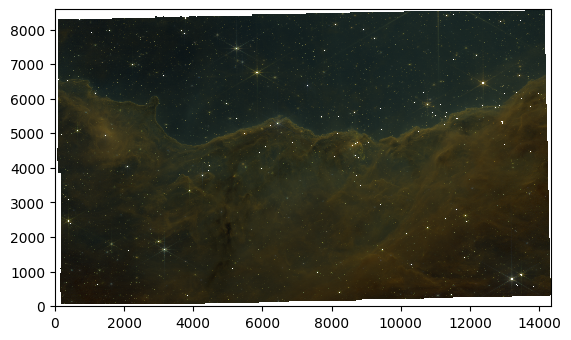

In [19]:
compiled_image = compiled_image.astype(np.float32)

plt.imshow(compiled_image, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_1.png', bbox_inches='tight')
plt.show()

#### 8.3.3 Method 2 - Use Suggested NIRCAM color palette with alpha blending

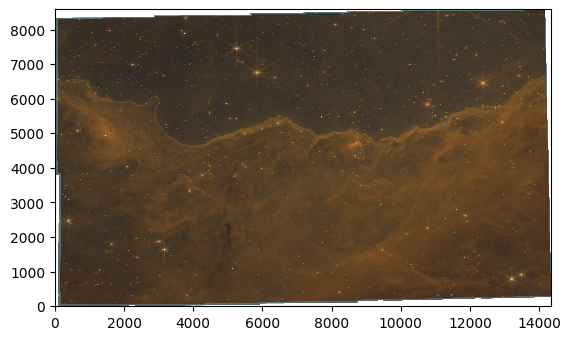

In [20]:
width, height = sci_data.shape
channels = 3

compiled_image = np.zeros((width, height, channels), dtype=np.float32)
for i, name in enumerate(filter_names):
    plt.imshow((np.expand_dims(all_filter_data[name], axis=2) * filter_colors[i]).astype(np.float32), alpha = 0.3, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_2.png', bbox_inches='tight')
plt.show()

In [21]:
all_filter_data.keys()

dict_keys(['clear-4090w', 'clear-f187n', 'clear-f200w', 'f444w-f470n', 'clear-f335m', 'clear-f444w'])

#### 8.3.3 Method 3 Test - Use RGB channels with 3 filters

In [22]:
### Let's combine the data into a single object, where each layer will correspond to a color
three_filter = np.zeros((sci_data.shape[0],sci_data.shape[1],3), dtype=np.float32)

three_filter[:,:,0] = all_filter_data['clear-4090w'] #red is filter 'clear-4090w'
three_filter[:,:,1] = all_filter_data['clear-f187n'] #green is filter 'clear-f187n'
three_filter[:,:,2] = all_filter_data['clear-f200w'] #blue is filter 'clear-f200w'

In [23]:
print(np.shape(three_filter))
print(np.nanmin(three_filter), np.nanmax(three_filter))

(8582, 14339, 3)
0.0 1.0


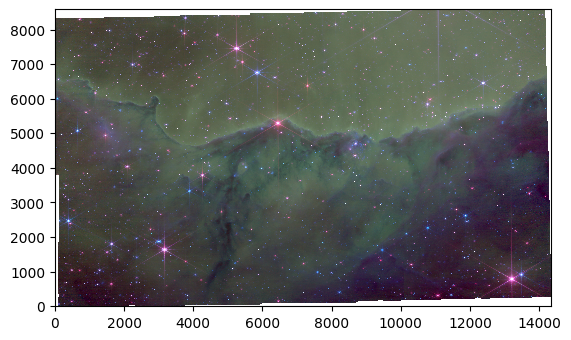

In [24]:
plt.imshow(three_filter, interpolation='nearest', origin='lower')

# plt.savefig('./jwst-saved-figures/fits_image.png', bbox_inches='tight')
del three_filter
plt.show()

#### 8.3.3 Method 3 - Use RGB channels with 6 filters by doing a linear combination of 2 filters per channel, chose the ones closest to each other on the color palette

In [39]:
### Let's combine the data into a single object, where each layer will correspond to a color
six_filter = np.zeros((sci_data.shape[0],sci_data.shape[1],3), dtype=np.float32)

for i in range(0, len(filter_names), 2):
    six_filter[:, :, i//2] = all_filter_data[filter_names[i]] * 0.5 + rescale_image(all_filter_data[filter_names[i+1]]) * 0.5

rescaling image...
VPMIN: 0.04987085610628128
VPMAX: 9.350786209106445
-1.3021532 0.0
rescaling complete!
rescaling image...
VPMIN: 0.04850972443819046
VPMAX: 9.095573425292969
-1.3141712 0.0
rescaling complete!
rescaling image...
VPMIN: 0.051896002143621445
VPMAX: 9.730501174926758
-1.2848661 0.0
rescaling complete!


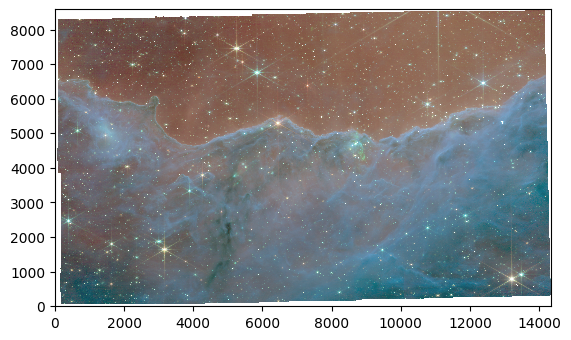

In [40]:
plt.imshow(six_filter, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_3.png', bbox_inches='tight')
plt.show()

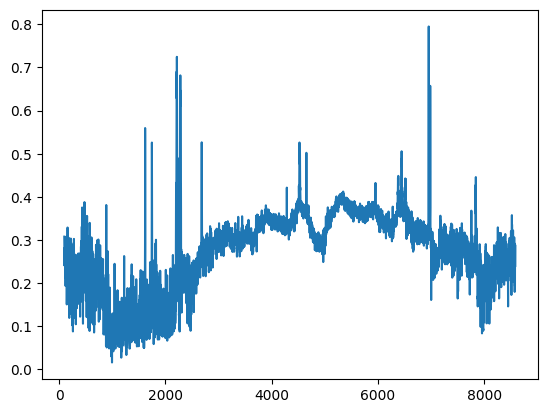

0.0 1.0
0.44438693 0.10287014


In [27]:
plt.plot(six_filter[100, : ,0])
plt.show()

print(np.nanmin(six_filter), np.nanmax(six_filter))
print(np.nanmean(six_filter), np.nanstd(six_filter))

#### 8.3.3 Method 4 - Interpret the 3 channels of the RGB as HSV instead

In [28]:
# interpret 6 filters as hsv
hsv_six_filter = mcolors.hsv_to_rgb(six_filter)

C:\Users\dylan\.pyenv\pyenv-win\versions\3.11.7\Lib\site-packages\matplotlib\colors.py:3175: RuntimeWarning: invalid value encountered in cast
  i = (h * 6.0).astype(int)


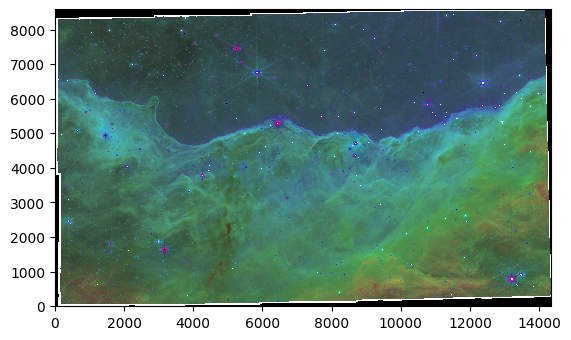

In [29]:
plt.imshow(hsv_six_filter, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_4.png', bbox_inches='tight')
plt.show()

#### 8.3.3 Method 4 - Mix and Match Channels for RGB and HSV

In [41]:
### Let's combine the data into a single object, where each layer will correspond to a color
alt_six_filter = np.zeros((sci_data.shape[0],sci_data.shape[1],3), dtype=np.float32)

alt_six_filter[:, :, 0] = six_filter[:, :, 2]
alt_six_filter[:, :, 1] = six_filter[:, :, 1]
alt_six_filter[:, :, 2] = six_filter[:, :, 0]

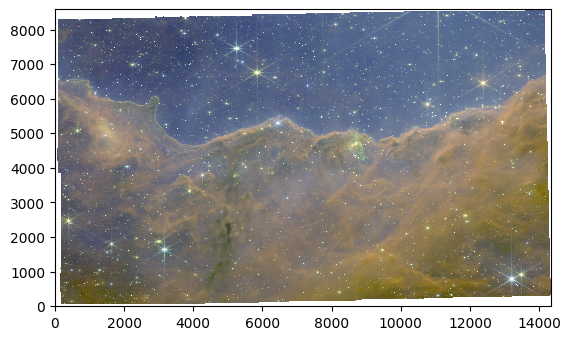

In [31]:
plt.imshow(alt_six_filter, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_5.png', bbox_inches='tight')
plt.show()

In [32]:
# interpret 6 filters as hsv
hsv_alt_six_filter = mcolors.hsv_to_rgb(alt_six_filter)

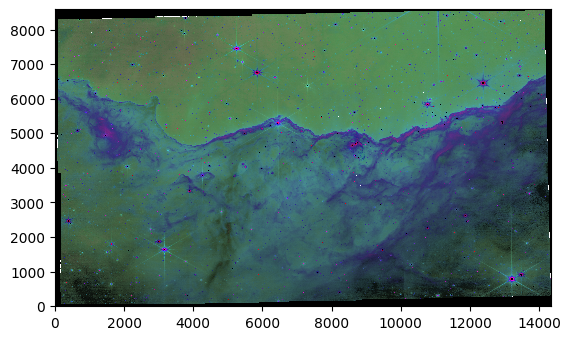

In [33]:
plt.imshow(hsv_alt_six_filter, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_6.png', bbox_inches='tight')
plt.show()

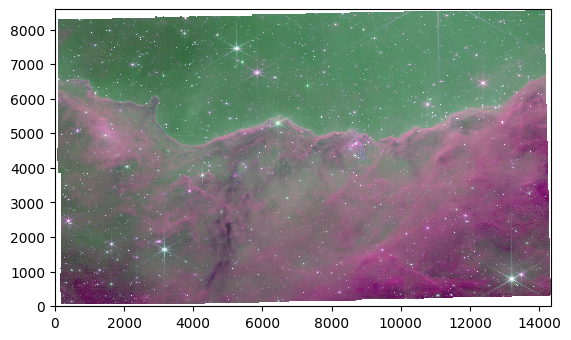

In [42]:
### Let's combine the data into a single object, where each layer will correspond to a color
alt_six_filter = np.zeros((sci_data.shape[0],sci_data.shape[1],3), dtype=np.float32)

alt_six_filter[:, :, 0] = six_filter[:, :, 2]
alt_six_filter[:, :, 1] = six_filter[:, :, 0]
alt_six_filter[:, :, 2] = six_filter[:, :, 1]

plt.imshow(alt_six_filter, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_7.png', bbox_inches='tight')
plt.show()

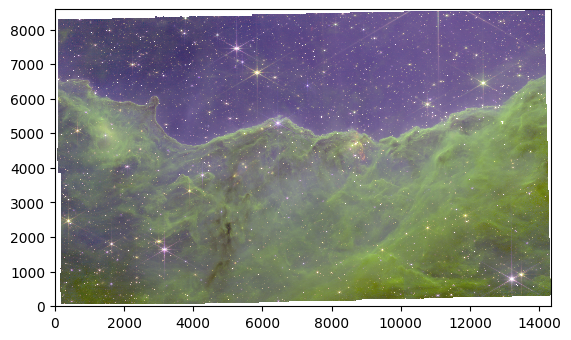

In [43]:
### Let's combine the data into a single object, where each layer will correspond to a color
alt_six_filter = np.zeros((sci_data.shape[0],sci_data.shape[1],3), dtype=np.float32)

alt_six_filter[:, :, 0] = six_filter[:, :, 1]
alt_six_filter[:, :, 1] = six_filter[:, :, 2]
alt_six_filter[:, :, 2] = six_filter[:, :, 0]

plt.imshow(alt_six_filter, interpolation='nearest', origin='lower')

plt.savefig('./jwst-saved-figures/false_color_ngcc_3324_8.png', bbox_inches='tight')
plt.show()